In [2]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/cleaning.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_resnet.py 
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_resnet_prelu.py   
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/helper.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/metrics.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/trainer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg19_bn.py 
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/model_blocks.py 

--2019-03-29 15:15:52--  https://github.com/MNRKhan/aps360-project/raw/master/modules/cleaning.py
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/cleaning.py [following]
--2019-03-29 15:15:52--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/cleaning.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8263 (8.1K) [text/plain]
Saving to: ‘cleaning.py.1’

cleaning.py.1       100%[===================>]   8.07K  --.-KB/s    in 0s      

2019-03-29 15:15:52 (65.2 MB/s) - ‘cleaning.py.1’ saved [8263/8263]

--2019-03-29 15:15:

In [0]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from cleaning import *
from data_loader import *
from model_blocks import *
from extractNet_resnet import *
from extractNet_resnet_prelu import *
from extractNet_connected_vgg19_bn import *
from helper import *
from metrics import *
from trainer import *
from visualizer import *

In [4]:
!rm -rf __MACOSX
!rm -rf *.zip
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
!unzip data_person_vehicle.zip
!rm -rf __MACOSX
!rm -rf *.zip

--2019-03-29 15:20:52--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip [following]
--2019-03-29 15:20:52--  https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141567675 (135M) [application/zip]
Saving to: ‘data_person_vehicle.zip’

data_person_vehicle 100%[===================>] 135.01M  

In [0]:
batch_size = 64
lr = 0.001

In [0]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes
size = len(dataset)
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

batch_size = 64

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

train_data = train_data[:999]
valid_data = valid_data[:199]

# Making dataloader
train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=0)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = extractNet_resnet()
net.to(device)

print("Model is being trained on:", device)

Model is being trained on: cuda:0


In [0]:
torch.cuda.empty_cache()

In [16]:
print(net)

extractNet_resnet(
  (res): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256,

In [9]:
# Train 
trainModel(net, train, valid, batch_size=batch_size, lr=lr, num_epochs=70, checkpoint=False, device=device)

Epoch:0, Train IoU:0.3721, Train Loss:0.0115|Valid IoU:0.3768, Valid Loss:0.0149
Epoch:1, Train IoU:0.4439, Train Loss:0.0107|Valid IoU:0.4483, Valid Loss:0.0135
Epoch:2, Train IoU:0.4548, Train Loss:0.0101|Valid IoU:0.4540, Valid Loss:0.0130
Epoch:3, Train IoU:0.5621, Train Loss:0.0099|Valid IoU:0.5604, Valid Loss:0.0128
Epoch:4, Train IoU:0.6141, Train Loss:0.0096|Valid IoU:0.6083, Valid Loss:0.0124
Epoch:5, Train IoU:0.6180, Train Loss:0.0095|Valid IoU:0.6105, Valid Loss:0.0121
Epoch:6, Train IoU:0.6481, Train Loss:0.0095|Valid IoU:0.6396, Valid Loss:0.0124
Epoch:7, Train IoU:0.6509, Train Loss:0.0094|Valid IoU:0.6393, Valid Loss:0.0121
Epoch:8, Train IoU:0.6529, Train Loss:0.0092|Valid IoU:0.6360, Valid Loss:0.0119
Epoch:9, Train IoU:0.6873, Train Loss:0.0092|Valid IoU:0.6627, Valid Loss:0.0118
Epoch:10, Train IoU:0.7005, Train Loss:0.0094|Valid IoU:0.6774, Valid Loss:0.0125
Epoch:11, Train IoU:0.7224, Train Loss:0.0092|Valid IoU:0.6906, Valid Loss:0.0121
Epoch:12, Train IoU:0.7277

KeyboardInterrupt: ignored

In [8]:
net_bn = extractNet_resnet_prelu()
net_bn.to(device)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
241530880it [00:04, 55628230.36it/s]


extractNet_resnet_prelu(
  (res): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64

In [9]:
trainModel(net_bn, train, valid, batch_size=batch_size, lr=lr, num_epochs=70, checkpoint=False, device=device)

Epoch:0, Train IoU:0.3128, Train Loss:0.0116|Valid IoU:0.3168, Valid Loss:0.0148
Epoch:1, Train IoU:0.3319, Train Loss:0.0114|Valid IoU:0.3351, Valid Loss:0.0147
Epoch:2, Train IoU:0.3486, Train Loss:0.0112|Valid IoU:0.3494, Valid Loss:0.0144


KeyboardInterrupt: ignored

In [10]:
net_bn2 = extractNet_resnet_prelu(act_type = 'P')
net_bn2.to(device)

extractNet_resnet_prelu(
  (res): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64

In [0]:
trainModel(net_bn2, train, valid, batch_size=batch_size, lr=lr, num_epochs=200, checkpoint=False, device=device)

Epoch:0, Train IoU:0.3435, Train Loss:0.0114|Valid IoU:0.3438, Valid Loss:0.0146
Epoch:1, Train IoU:0.4568, Train Loss:0.0107|Valid IoU:0.4568, Valid Loss:0.0138
Epoch:2, Train IoU:0.5673, Train Loss:0.0100|Valid IoU:0.5671, Valid Loss:0.0129
Epoch:3, Train IoU:0.5979, Train Loss:0.0097|Valid IoU:0.5936, Valid Loss:0.0124
Epoch:4, Train IoU:0.5840, Train Loss:0.0096|Valid IoU:0.5770, Valid Loss:0.0124
Epoch:5, Train IoU:0.6152, Train Loss:0.0096|Valid IoU:0.6108, Valid Loss:0.0122
Epoch:6, Train IoU:0.6452, Train Loss:0.0098|Valid IoU:0.6409, Valid Loss:0.0125
Epoch:7, Train IoU:0.6246, Train Loss:0.0095|Valid IoU:0.6156, Valid Loss:0.0124
Epoch:8, Train IoU:0.6321, Train Loss:0.0096|Valid IoU:0.6205, Valid Loss:0.0122
Epoch:9, Train IoU:0.6689, Train Loss:0.0094|Valid IoU:0.6566, Valid Loss:0.0121
Epoch:10, Train IoU:0.6856, Train Loss:0.0094|Valid IoU:0.6703, Valid Loss:0.0121
Epoch:11, Train IoU:0.6203, Train Loss:0.0094|Valid IoU:0.6046, Valid Loss:0.0120
Epoch:12, Train IoU:0.6574

In [0]:
#compare to 
comp_net = extractNet_connected_vgg19_bn()
comp_net.to(device)

extractNet_connected_vgg19_bn(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

In [0]:
trainModel(comp_net, train, valid, batch_size=batch_size, lr=lr, num_epochs=70, checkpoint=True, device=device)

Epoch:0, Train IoU:0.2966, Train Loss:0.0116|Valid IoU:0.2987, Valid Loss:0.0154
Epoch:1, Train IoU:0.2965, Train Loss:0.0115|Valid IoU:0.2956, Valid Loss:0.0153
Epoch:2, Train IoU:0.3259, Train Loss:0.0114|Valid IoU:0.3221, Valid Loss:0.0152
Epoch:3, Train IoU:0.3789, Train Loss:0.0108|Valid IoU:0.3654, Valid Loss:0.0146
Epoch:4, Train IoU:0.4549, Train Loss:0.0107|Valid IoU:0.4356, Valid Loss:0.0146
Epoch:5, Train IoU:0.4439, Train Loss:0.0098|Valid IoU:0.4064, Valid Loss:0.0134
Epoch:6, Train IoU:0.5070, Train Loss:0.0101|Valid IoU:0.4691, Valid Loss:0.0140
Epoch:7, Train IoU:0.5537, Train Loss:0.0098|Valid IoU:0.5022, Valid Loss:0.0136
Epoch:8, Train IoU:0.5968, Train Loss:0.0095|Valid IoU:0.5312, Valid Loss:0.0132
Epoch:9, Train IoU:0.6635, Train Loss:0.0095|Valid IoU:0.5827, Valid Loss:0.0134
Epoch:10, Train IoU:0.6393, Train Loss:0.0093|Valid IoU:0.5604, Valid Loss:0.0129
Epoch:11, Train IoU:0.6785, Train Loss:0.0095|Valid IoU:0.5964, Valid Loss:0.0134
Epoch:12, Train IoU:0.6804

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [0]:
#compare to without leaky relu
net2 = extractNet_connected_vgg19_bn_leaky(alpha=0.0)
net2.to(device)

extractNet_connected_vgg19_bn_leaky(
  (vgg_feature): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): 

In [0]:
trainModel(net2, train, valid, batch_size=batch_size, lr=lr, num_epochs=70, checkpoint=False, device=device)

Epoch:0, Train IoU:0.3332, Train Loss:0.0116|Valid IoU:0.3337, Valid Loss:0.0155
Epoch:1, Train IoU:0.3314, Train Loss:0.0113|Valid IoU:0.3253, Valid Loss:0.0152
Epoch:2, Train IoU:0.4299, Train Loss:0.0104|Valid IoU:0.4042, Valid Loss:0.0143
Epoch:3, Train IoU:0.5533, Train Loss:0.0105|Valid IoU:0.5155, Valid Loss:0.0146
Epoch:4, Train IoU:0.5725, Train Loss:0.0098|Valid IoU:0.5154, Valid Loss:0.0136
Epoch:5, Train IoU:0.5428, Train Loss:0.0100|Valid IoU:0.4960, Valid Loss:0.0138
Epoch:6, Train IoU:0.5479, Train Loss:0.0096|Valid IoU:0.4893, Valid Loss:0.0133
Epoch:7, Train IoU:0.6196, Train Loss:0.0096|Valid IoU:0.5550, Valid Loss:0.0135


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [0]:
#compare to without leaky relu
net3 = extractNet_connected_vgg19_bn_leaky(alpha=0.01)
net3.to(device)

extractNet_connected_vgg19_bn_leaky(
  (vgg_feature): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): 

In [0]:
trainModel(net3, train, valid, batch_size=batch_size, lr=lr, num_epochs=70, checkpoint=False, device=device)

Epoch:0, Train IoU:0.3370, Train Loss:0.0115|Valid IoU:0.3375, Valid Loss:0.0154
Epoch:1, Train IoU:0.3289, Train Loss:0.0115|Valid IoU:0.3263, Valid Loss:0.0153
Epoch:2, Train IoU:0.3751, Train Loss:0.0112|Valid IoU:0.3639, Valid Loss:0.0151
Epoch:3, Train IoU:0.4299, Train Loss:0.0108|Valid IoU:0.4038, Valid Loss:0.0147
Epoch:4, Train IoU:0.4437, Train Loss:0.0105|Valid IoU:0.4133, Valid Loss:0.0143
Epoch:5, Train IoU:0.5442, Train Loss:0.0101|Valid IoU:0.4969, Valid Loss:0.0139
Epoch:6, Train IoU:0.5496, Train Loss:0.0098|Valid IoU:0.4885, Valid Loss:0.0134
Epoch:7, Train IoU:0.6167, Train Loss:0.0098|Valid IoU:0.5523, Valid Loss:0.0137
Epoch:8, Train IoU:0.5805, Train Loss:0.0095|Valid IoU:0.5057, Valid Loss:0.0132


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f66b2ef6898>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f66b2ef6898>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", 

Epoch:9, Train IoU:0.6553, Train Loss:0.0097|Valid IoU:0.5722, Valid Loss:0.0135
Epoch:10, Train IoU:0.6533, Train Loss:0.0093|Valid IoU:0.5624, Valid Loss:0.0130
Epoch:11, Train IoU:0.6769, Train Loss:0.0093|Valid IoU:0.5837, Valid Loss:0.0131
Epoch:12, Train IoU:0.7029, Train Loss:0.0092|Valid IoU:0.5977, Valid Loss:0.0130
Epoch:13, Train IoU:0.7447, Train Loss:0.0091|Valid IoU:0.6180, Valid Loss:0.0130


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f66b2ef6898>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch:14, Train IoU:0.7592, Train Loss:0.0089|Valid IoU:0.6259, Valid Loss:0.0129


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f66b2ef6898>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f66b2ef6898>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", 

Epoch:15, Train IoU:0.7918, Train Loss:0.0088|Valid IoU:0.6376, Valid Loss:0.0127


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f66b2ef6898>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch:16, Train IoU:0.7598, Train Loss:0.0087|Valid IoU:0.6027, Valid Loss:0.0126
Epoch:17, Train IoU:0.8077, Train Loss:0.0088|Valid IoU:0.6631, Valid Loss:0.0129
Epoch:18, Train IoU:0.7620, Train Loss:0.0087|Valid IoU:0.5980, Valid Loss:0.0126
Epoch:19, Train IoU:0.7997, Train Loss:0.0089|Valid IoU:0.6547, Valid Loss:0.0131


KeyboardInterrupt: ignored

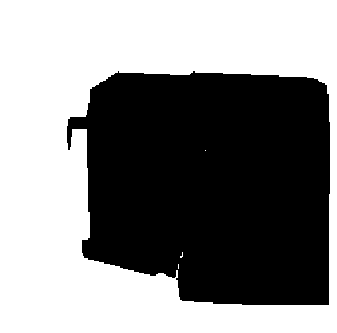

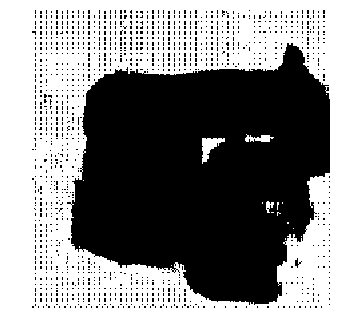

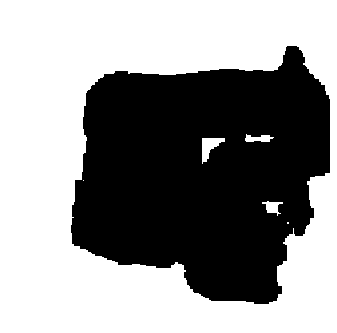

<Figure size 576x396 with 0 Axes>

In [0]:
# After training (train set)
img, target = train_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(target)
imshow(out)
imshow(denoised)

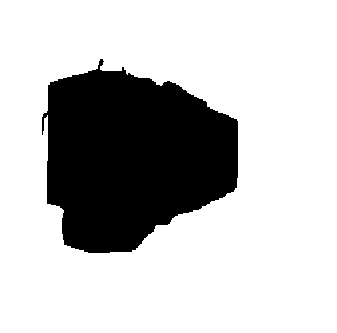

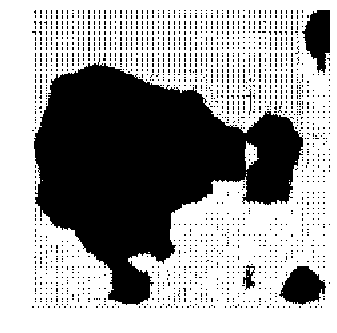

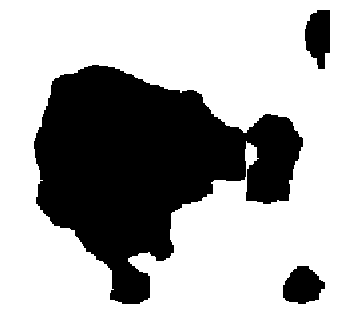

<Figure size 576x396 with 0 Axes>

In [0]:
# After training (validation set)
img, target = valid_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(target)
imshow(out)
imshow(denoised)